In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importar Seaborn para estilos adicionales

Esta función se ha desarrollodo para encontrar los genes head-to-hed(H2H) entre los genes dimóficos obtenidos en el preprocesamiento.
**Diccionario de Resultados**:
    - Se inicializa un diccionario vacío que almacenará los genes vecinos para cada gen en el DataFrame.
    
**Función Interna calcular_vecinos**:
    - Esta función recibe la información de un gen y el DataFrame completo de genes. Inicializa una lista vecinos y extrae la información relevante del gen (inicio, fin, strand, morfologia, scaffold).
    
**Iteración y Cálculo de Vecinos**:
     Se itera sobre cada gen en el DataFrame. Para cada gen, se verifica si:

        - La orientación (strand) es diferente.
        - La morfología (Morfologia) es la misma.
        - El scaffold es el mismo.
Si las condiciones se cumplen, se calcula la distancia entre los genes dependiendo de la orientación. Si la distancia es menor a 500 unidades, se añade el ID del gen vecino a la lista vecinos.

**Asignación de Vecinos**:
    - La función interna devuelve la lista de vecinos para el gen específico.
    
**Construcción del Diccionario de Vecinos**:
    - Se itera sobre todos los genes en el DataFrame. Para cada gen, se llama a calcular_vecinos. Si el resultado no está vacío, se añade al diccionario genes_vecinos_todos con el ID del gen como clave y la lista de vecinos como valor.

**Retorno del Resultado**: 
 La función principal genes_vecinos devuelve el diccionario con todos los genes vecinos.
    

In [5]:
def genes_vecinos(df_genes):
    #Diccionario para almacenar los resultados
    genes_vecinos_todos = {}

    # Función interna para calcular los vecinos de un gen específico
    def calcular_vecinos(gen_info, df_genes):
        vecinos = []
        inicio = gen_info['start']
        fin = gen_info['end']
        strand = gen_info['strand']
        morfologia = gen_info['Morfologia']
        scaffold = gen_info['scaffold']

        for _, gen_info2 in df_genes.iterrows():
            if (gen_info2['strand'] != strand) and (gen_info2['Morfologia'] == morfologia) and (gen_info2['scaffold'] == scaffold):
                if strand == "+":
                    distancia = abs(inicio - gen_info2['end'])
                else:
                    distancia = abs(gen_info2['start'] - fin)

                if distancia < 500:
                    vecinos.append(gen_info2['ID'])

        return vecinos

    # Iterar sobre todos los gen ID en el DataFrame
    for _, gen_info in df_genes.iterrows():
        vecinos = calcular_vecinos(gen_info, df_genes)
        if vecinos:
            genes_vecinos_todos[gen_info['ID']] = vecinos

    return genes_vecinos_todos

In [ ]:
**dataframe con los GENES DIMÓRFICOS
- Tiene 1730 filas, es decir genes o proteínas. 
- Se va a guaradar en clusters_dimor

In [6]:
clusters_dimor = pd.read_csv("clusters_dimorficos.csv")
clusters_dimor.head(2)

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Proteina,NumeroProteinas,NumeroProteinas_filtered
0,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2,2
1,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2,2


Obtención del archivo GFF que contiene los datos de los localizaciones genómicas de los genes. 

In [7]:
gff3=pd.read_csv("gff_def.csv", sep=";")
gff3.head(2)

,scaffold,prediction,type,start,end,strand,ID,proteinId,transcriptId
0,scaffold_1,prediction,gene,70916,72280,+,1000253,1000253,1000707
1,scaffold_1,prediction,gene,87623,88752,-,1000305,1000305,1000759


**Hacer el merge de los datos de clusters_dimórficos y del GFF.**
Hacer el merge de los clusters dimórficos con el del archivo GFF que contiene los datos de los localizaciones genómicas de los genes. 
La tabla resultante de hacer el merge de los datos de los genes dimórficos y del gff3 se llama tabla_clusters_gff

In [10]:
tabla_clusters_gff=pd.merge(clusters_dimor, gff3, on="ID")
tabla_clusters_gff.head(2)

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Proteina,NumeroProteinas,NumeroProteinas_filtered,scaffold,prediction,type,start,end,strand,proteinId,transcriptId
0,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2,2,scaffold_3,prediction,gene,649371,662419,+,1354593,1355047
1,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2,2,scaffold_3,prediction,gene,1924256,1936805,-,1446136,1446590


In [10]:
# Carga del DataFrame de genes que se llama tabla_clusters_gff
df_genes_dim = tabla_clusters_gff
# Llamada a la función genes_vecinos
genes_con_vecinos_dim = genes_vecinos(df_genes_dim)

print("número de vecinos totales:", len(genes_con_vecinos_dim))
# Imprimir los genes con sus vecinos
for gen, vecinos in genes_con_vecinos_dim.items():
    print(f"Gen ID: {gen}, Vecinos: {vecinos}")


número de vecinos totales: 44
Gen ID: 1458659, Vecinos: [1458664]
Gen ID: 1457033, Vecinos: [1347260]
Gen ID: 1520146, Vecinos: [1520149]
Gen ID: 1497021, Vecinos: [1497033]
Gen ID: 1548982, Vecinos: [1548977]
Gen ID: 1452120, Vecinos: [1549906]
Gen ID: 1506145, Vecinos: [1447584]
Gen ID: 1547701, Vecinos: [1547714]
Gen ID: 1456582, Vecinos: [1456584]
Gen ID: 1489536, Vecinos: [1489534]
Gen ID: 1533515, Vecinos: [1533506]
Gen ID: 1559204, Vecinos: [1461375]
Gen ID: 1535864, Vecinos: [1366139]
Gen ID: 1519586, Vecinos: [1519581]
Gen ID: 1548977, Vecinos: [1548982]
Gen ID: 1519581, Vecinos: [1519586]
Gen ID: 1458664, Vecinos: [1458659]
Gen ID: 1326364, Vecinos: [1351014]
Gen ID: 1549906, Vecinos: [1452120]
Gen ID: 1385661, Vecinos: [1511387]
Gen ID: 1511387, Vecinos: [1385661]
Gen ID: 1347260, Vecinos: [1457033]
Gen ID: 1351014, Vecinos: [1326364]
Gen ID: 1448086, Vecinos: [1510844]
Gen ID: 1461375, Vecinos: [1559204]
Gen ID: 1533506, Vecinos: [1533515]
Gen ID: 1463347, Vecinos: [1463345

In [11]:
# Convertir el diccionario en un dataframe de pandas
data_df_dim = pd.DataFrame(list(genes_con_vecinos_dim.items()), columns=['Gen_ID', 'Vecinos'])
# Guardar el dataframe en un archivo de texto
data_df_dim.to_csv("vec_dimorficos.csv", sep=',', index=False)

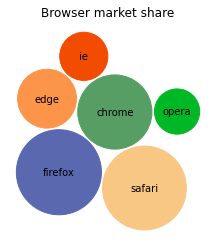

In [2]:
import matplotlib.pyplot as plt
import numpy as np

browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 6.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()

In [ ]:
def merge_kog_clusters(kog_file, clusters_file):
    """
    Función para realizar el merge de los datos de clusters dimórficos con los datos de funciones KOG.
    
    Parameters:
    kog_file (str): Nombre del archivo CSV que contiene los datos KOG.
    clusters_file (str): Nombre del archivo CSV que contiene los datos de clusters dimórficos.
    output_file (str): Nombre del archivo CSV donde se guardarán los datos combinados.
    
    Returns:
    pd.DataFrame: DataFrame con los datos combinados.
    """
    # Leer el archivo KOG
    kog_mucor = pd.read_csv(kog_file, sep=";")
    
    # Eliminar filas duplicadas basadas en 'proteinId', manteniendo la primera ocurrencia
    kog_mucor = kog_mucor.drop_duplicates(subset="proteinId", keep='first')
    
    # Leer el archivo de clusters dimórficos
    clusters_dimorficos = pd.read_csv(clusters_file)
    clusters_dimorficos = clusters_dimorficos[clusters_dimorficos["Morfologia"] !="Not_differential"]
    
    # Realizar el merge de los datos
    kog_clusters_dimorficos = pd.merge(clusters_dimorficos, kog_mucor, left_on="ID", right_on="proteinId")
    
    return kog_clusters_dimorficos